In [61]:
# preparing data

In [62]:
from nltk.corpus import stopwords
import string
import re
from os import listdir
from keras_preprocessing.text import Tokenizer

In [63]:
def load_doc(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

In [64]:
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]'%re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    return tokens

In [5]:
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

In [6]:
# Define a vocabulary

In [7]:
def add_doc_to_vocab(filename,vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)

In [8]:
def process_docs(directory,vocab):
    for filename in listdir(directory):
        if filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        add_doc_to_vocab(path,vocab)

In [9]:
from collections import Counter
vocab = Counter()

In [10]:
process_docs('txt_sentoken/pos',vocab)
process_docs('txt_sentoken/neg',vocab)
print(len(vocab))
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [11]:
min_occurane = 2
tokens = [k for k,c in vocab.items() if c>=min_occurane]
print(len(tokens))

25767


In [12]:
def save_list(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w')
    file.write(data)
    file.close()

In [13]:
save_list(tokens,'vocab.txt')

In [14]:
# reviews to lines of tokens

In [65]:
def doc_to_line(filename,vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [66]:
def process_docs(directory,vocab):
    lines = list()
    for filename in listdir(directory):
#         if filename.startswith('cv9'):
#             continue
        path = directory + '/' + filename
        line = doc_to_line(path,vocab)
        lines.append(line)
    return lines

In [67]:
def load_clean_dataset(vocab):
    neg = process_docs('txt_sentoken/neg',vocab)
    pos = process_docs('txt_sentoken/pos',vocab)
    docs = neg + pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [18]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [19]:
docs,labels = load_clean_dataset(vocab)

In [20]:
print(len(docs),len(labels))

1800 1800


In [21]:
# Bag of words vectors

In [68]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [23]:
def process_docs(directory,vocab,is_train):
    lines =list()
    for filename in listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path,vocab)
        lines.append(line)
    return lines

In [24]:
def load_clean_dataset(vocab, is_train):
    neg = process_docs('txt_sentoken/neg',vocab,is_train)
    pos = process_docs('txt_sentoken/pos',vocab,is_train)
    docs= neg+pos
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [71]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [72]:
train_docs, ytrain = load_clean_dataset(vocab)#,True)
test_docs,ytest = load_clean_dataset(vocab)#,False)

In [73]:
tokenizer = create_tokenizer(train_docs)

In [74]:
Xtrain = tokenizer.texts_to_matrix(train_docs,mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs,mode='binary')
# print(Xtrain.shape,Xtest.shape)

In [29]:
# First sentiment analysis model

In [75]:
n_words = Xtest.shape[1]

In [69]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
def define_model(n_words):
    model = Sequential()
    model.add(Dense(50,input_shape = (n_words,),activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
#     model.summary()
#     plot_model(model,to_file="model.png",show_shapes=True)
    return model

In [76]:
model = define_model(n_words)
model.fit(Xtrain,ytrain,epochs=10,verbose=2)
# loss,acc = model.evaluate(Xtest,ytest,verbose=0)
# print("Test Accuracy: %f"%(acc*100))

Epoch 1/10
 - 2s - loss: 0.4509 - accuracy: 0.7990
Epoch 2/10
 - 1s - loss: 0.0545 - accuracy: 0.9945
Epoch 3/10
 - 1s - loss: 0.0158 - accuracy: 1.0000
Epoch 4/10
 - 1s - loss: 0.0076 - accuracy: 1.0000
Epoch 5/10
 - 1s - loss: 0.0039 - accuracy: 1.0000
Epoch 6/10
 - 1s - loss: 0.0023 - accuracy: 1.0000
Epoch 7/10
 - 2s - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
 - 1s - loss: 7.8774e-04 - accuracy: 1.0000
Epoch 10/10
 - 1s - loss: 6.0480e-04 - accuracy: 1.0000


In [48]:
# Evaluate different encoding schemes

In [49]:
def prepare_data(train_docs, test_docs, mode):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_docs)
    Xtrain = tokenizer.texts_to_matrix(train_docs,mode=mode)
    Xtest = tokenizer.texts_to_matrix(test_docs,mode=mode)
    return Xtrain, Xtest

In [50]:
# Evaluate MLP

In [51]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        model = define_model(n_words)
        model.fit(Xtrain,ytrain,epochs=10,verbose=0)
        _ ,acc = model.evaluate(Xtest,ytest,verbose=0)
        scores.append(acc)
        print("%d accuracy: %s"%((i+1),acc))
    return scores

In [52]:
from pandas import DataFrame
from matplotlib import pyplot

In [53]:
modes = ['binary','count','tfidf','freq']
results = DataFrame()

In [54]:
for mode in modes:
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)

print(results.describe())

1 accuracy: 0.9350000023841858
2 accuracy: 0.9150000214576721
3 accuracy: 0.9200000166893005
4 accuracy: 0.9350000023841858
5 accuracy: 0.9200000166893005
6 accuracy: 0.9350000023841858
7 accuracy: 0.925000011920929
8 accuracy: 0.9399999976158142
9 accuracy: 0.9300000071525574
10 accuracy: 0.9200000166893005
1 accuracy: 0.9049999713897705
2 accuracy: 0.8949999809265137
3 accuracy: 0.8849999904632568
4 accuracy: 0.8799999952316284
5 accuracy: 0.8999999761581421
6 accuracy: 0.8999999761581421
7 accuracy: 0.9100000262260437
8 accuracy: 0.8949999809265137
9 accuracy: 0.8999999761581421
10 accuracy: 0.9049999713897705
1 accuracy: 0.8949999809265137
2 accuracy: 0.8700000047683716
3 accuracy: 0.8849999904632568
4 accuracy: 0.8700000047683716
5 accuracy: 0.8849999904632568
6 accuracy: 0.8700000047683716
7 accuracy: 0.8899999856948853
8 accuracy: 0.8650000095367432
9 accuracy: 0.8849999904632568
10 accuracy: 0.8799999952316284
1 accuracy: 0.8700000047683716
2 accuracy: 0.8700000047683716
3 accu

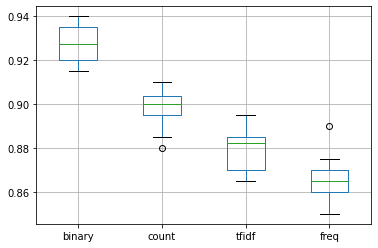

In [55]:
results.boxplot()
pyplot.show()

In [70]:
def predict_sentiment(review, vocab, tokenizer, model):
    tokens = clean_doc(review)
    tokens = [w for w in tokens if w in vocab]
    line = ''.join(tokens)
    encoded = tokenizer.texts_to_matrix([line],mode='binary')
    yhat = model.predict(encoded,verbose=0)
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'
    

In [80]:
text = 'This is a bad movie.'

In [81]:
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)

In [82]:
print('Review: [%s]\nSentiment: %s (%.3f%%)'%(text,sentiment,percent*100))

Review: [This is a bad movie.]
Sentiment: NEGATIVE (54.672%)
